<a href="https://colab.research.google.com/github/Kritsakorn-64/229352-StatisticalLearning/blob/main/651610014_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [15]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [16]:
# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [17]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [18]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

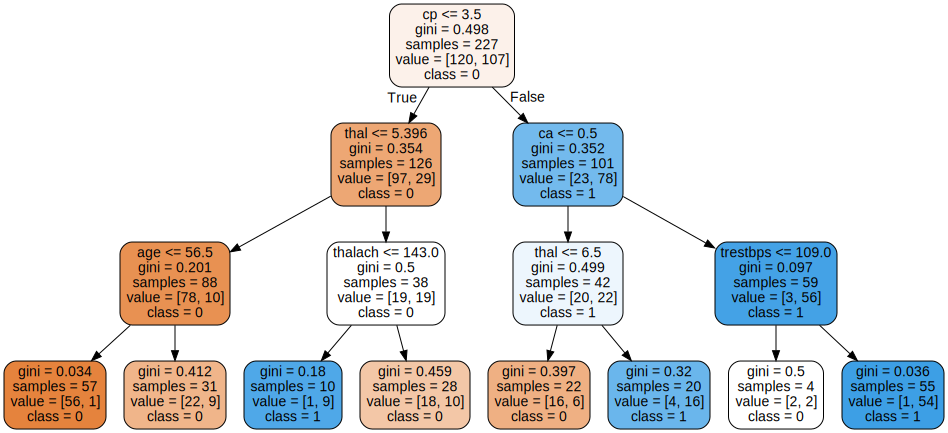

In [19]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [20]:
data.columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [21]:
clf = DecisionTreeClassifier()

In [22]:
from sklearn.metrics import classification_report

bagged_trees = BaggingClassifier(
    estimator=clf, n_estimators=100, max_samples=0.8
    )
bagged_trees.fit(X_train, y_train)
print(classification_report(y_test, bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        44
           1       0.90      0.81      0.85        32

    accuracy                           0.88        76
   macro avg       0.88      0.87      0.88        76
weighted avg       0.88      0.88      0.88        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [23]:
forest = RandomForestClassifier(n_estimators=200, max_depth=6)
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        44
           1       0.87      0.81      0.84        32

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.87      0.87        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [24]:
# Step 1: Hyperparameter tuning for Decision Tree
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('clf', DecisionTreeClassifier())
])

# Choose at least 3 hyperparameters for Decision Tree
dt_params = {
    'clf__max_depth': [3, 6, 9, 12, None],  # Maximum depth of the tree
    'clf__min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'clf__min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a leaf node
    'clf__criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

dt_gridcv = GridSearchCV(dt_pipeline, dt_params, scoring='accuracy', cv=5)
dt_gridcv.fit(X_train, y_train)

print("Best hyperparameters for Decision Tree:")
print(dt_gridcv.best_params_)
print("\nBest cross-validation accuracy for Decision Tree:")
print(dt_gridcv.best_score_)

Best hyperparameters for Decision Tree:
{'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5}

Best cross-validation accuracy for Decision Tree:
0.7753623188405797


In [25]:
# Step 2: Hyperparameter tuning for Bagged Decision Trees
bagging_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('clf', BaggingClassifier(estimator=DecisionTreeClassifier()))
])

# Choose at least 3 hyperparameters for Bagged Decision Trees
bagging_params = {
    'clf__n_estimators': [50, 100],  # Reduced number of base estimators
    'clf__max_samples': [0.5, 0.8], # Reduced range for the number of samples to draw
    'clf__max_features': [0.5, 0.8], # Reduced range for the number of features to draw
    'clf__estimator__max_depth': [3, 6, None] # Reduced range for max depth of individual decision trees
}

bagging_gridcv = GridSearchCV(bagging_pipeline, bagging_params, scoring='accuracy', cv=5)
bagging_gridcv.fit(X_train, y_train)

print("Best hyperparameters for Bagged Decision Trees:")
print(bagging_gridcv.best_params_)
print("\nBest cross-validation accuracy for Bagged Decision Trees:")
print(bagging_gridcv.best_score_)

Best hyperparameters for Bagged Decision Trees:
{'clf__estimator__max_depth': None, 'clf__max_features': 0.5, 'clf__max_samples': 0.5, 'clf__n_estimators': 100}

Best cross-validation accuracy for Bagged Decision Trees:
0.8235748792270531


In [26]:
# Step 3: Hyperparameter tuning for Random Forest
forest_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('clf', RandomForestClassifier())
])

# Choose at least 3 hyperparameters for Random Forest
forest_params = {
    'clf__n_estimators': [50, 100, 150],  # Reduced number of trees in the forest
    'clf__max_depth': [3, 6, None], # Reduced range for maximum depth of individual trees
    'clf__min_samples_split': [2, 5], # Reduced range for minimum number of samples required to split an internal node
    'clf__min_samples_leaf': [1, 2], # Reduced range for minimum number of samples required to be at a leaf node
}

forest_gridcv = GridSearchCV(forest_pipeline, forest_params, scoring='accuracy', cv=5)
forest_gridcv.fit(X_train, y_train)

print("Best hyperparameters for Random Forest:")
print(forest_gridcv.best_params_)
print("\nBest cross-validation accuracy for Random Forest:")
print(forest_gridcv.best_score_)

Best hyperparameters for Random Forest:
{'clf__max_depth': 3, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 150}

Best cross-validation accuracy for Random Forest:
0.8324637681159419
